In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
import pyts
from pyts import classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc

In [3]:
X_train = np.load("RavdessAudioOnlyNumpy__X_train_decimated_scaled_max.npy")
X_test = np.load("RavdessAudioOnlyNumpy__X_test_decimated_scaled_max.npy")
y_train = pd.read_csv("RavdessAudioOnlyNumpy__Y_train.csv")
y_test = pd.read_csv("RavdessAudioOnlyNumpy__Y_test.csv")

In [4]:
y_train = y_train["emotion"]
y_test = y_test["emotion"]

## KNN

### pyts

In [5]:
knn_eucl = pyts.classification.KNeighborsClassifier(metric="euclidean")
knn_eucl.fit(X_train, y_train)

y_pred_knn_eucl = knn_eucl.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_knn_eucl))
print('F1-score %s' % f1_score(y_test, y_pred_knn_eucl, average=None))
print(classification_report(y_test, y_pred_knn_eucl))

Accuracy 0.20673076923076922
F1-score [0.19428571 0.3        0.10126582 0.13173653 0.21875    0.27868852
 0.21198157 0.125     ]
              precision    recall  f1-score   support

       angry       0.22      0.18      0.19        96
        calm       0.29      0.31      0.30        96
     disgust       0.13      0.08      0.10        48
     fearful       0.15      0.11      0.13        96
       happy       0.22      0.22      0.22        96
     neutral       0.23      0.35      0.28        48
         sad       0.19      0.24      0.21        96
   surprised       0.12      0.12      0.12        48

    accuracy                           0.21       624
   macro avg       0.19      0.20      0.20       624
weighted avg       0.20      0.21      0.20       624



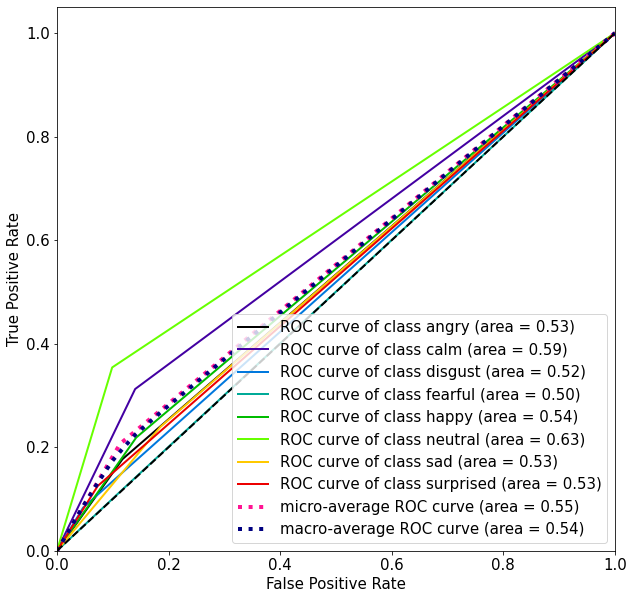

In [6]:
y_score = knn_eucl.predict_proba(X_test)
plot_roc(y_test, y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.show()

In [7]:
knn_dtw = pyts.classification.KNeighborsClassifier(metric="dtw")
knn_dtw.fit(X_train, y_train)

y_pred_knn_dtw = knn_dtw.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_knn_dtw))
print('F1-score %s' % f1_score(y_test, y_pred_knn_dtw, average=None))
print(classification_report(y_test, y_pred_knn_dtw))

Accuracy 0.22435897435897437
F1-score [0.27027027 0.34080717 0.23809524 0.13496933 0.23350254 0.15789474
 0.17560976 0.15584416]
              precision    recall  f1-score   support

       angry       0.28      0.26      0.27        96
        calm       0.30      0.40      0.34        96
     disgust       0.28      0.21      0.24        48
     fearful       0.16      0.11      0.13        96
       happy       0.23      0.24      0.23        96
     neutral       0.14      0.19      0.16        48
         sad       0.17      0.19      0.18        96
   surprised       0.21      0.12      0.16        48

    accuracy                           0.22       624
   macro avg       0.22      0.21      0.21       624
weighted avg       0.22      0.22      0.22       624



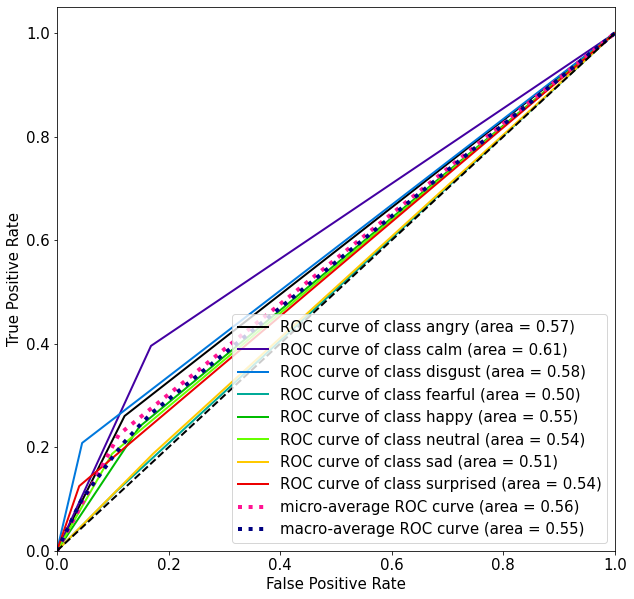

In [8]:
y_score = knn_dtw.predict_proba(X_test)
plot_roc(y_test, y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.show()

## Shapelets Classifier

In [9]:
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

2023-07-02 19:41:15.870221: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

In [ ]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes, optimizer="sgd", weight_regularizer=.01, max_iter=200, verbose=1)

In [ ]:
shp_clf.fit(X_train, y_train)

In [ ]:

y_pred = shp_clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


In [ ]:
X_train_sh = shp_clf.transform(X_train)
X_test_sh = shp_clf.transform(X_test)

In [ ]:
knn_shp = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_shp.fit(X_train_sh, y_train)


y_pred_knn_shp = knn_shp.predict(X_test_sh)

print('Accuracy %s' % accuracy_score(y_test, y_pred_knn_shp))
print('F1-score %s' % f1_score(y_test, y_pred_knn_shp, average=None))
print(classification_report(y_test, y_pred_knn_shp))

In [ ]:
y_score = knn_shp.predict_proba(X_test_sh)
plot_roc(y_test, y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.show()

In [ ]:
dt_shp = DecisionTreeClassifier(max_depth=8, random_state=42, class_weight="balanced")
dt_shp.fit(X_train_sh, y_train)

y_pred_dt_shp = dt_shp.predict(X_test_sh)

print('Accuracy %s' % accuracy_score(y_test, y_pred_dt_shp))
print('F1-score %s' % f1_score(y_test, y_pred_dt_shp, average=None))
print(classification_report(y_test, y_pred_dt_shp))

In [ ]:
y_score = dt_shp.predict_proba(X_test_sh)
plot_roc(y_test, y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.show()

## CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, BatchNormalization

In [ ]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=3, kernel_size=3, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.1))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

In [ ]:
to_int_map={"angry":0, "calm":1, "disgust":2, "fearful":3, "happy":4, "neutral":5, "sad":6, "surprised":7}
y_train_cnn=np.asarray([to_int_map.get(string,0) for string in y_train_cnn])
y_test_cnn=np.asarray([to_int_map.get(string,0) for string in y_test])
y_val_cnn=np.asarray([to_int_map.get(string,0) for string in y_val_cnn])
y_test_cnn=np.asarray([to_int_map.get(string,0) for string in y_test])

In [ ]:
cnn = build_simple_cnn(n_timesteps, n_outputs)
cnn.summary()

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [ ]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.0001)
#mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=8, verbose=1, restore_best_weights=True)

callbacks = [rlr, es] 
             #, mc]
batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))


history = cnn.fit(X_train_cnn, y_train_cnn, epochs=100, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn))

In [ ]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [ ]:
plt.plot(train_loss, label="train")
plt.plot(val_loss, label="val")
plt.legend()
plt.show()

In [ ]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test_cnn, y_pred))
print('F1-score %s' % f1_score(y_test_cnn, y_pred, average=None))
print(classification_report(y_test_cnn, y_pred))

In [ ]:
y_score = cnn.predict(X_test_cnn)
plot_roc(y_test_cnn, y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.show()